# 머신러닝 1:  ScikitLearn 공부 해볼꺼당

정리  
- 데이터 불러오기  
- (분석하기 위한 데이터 전처리 과정 수행)  
- 데이터 분리하기  
- 모델 학습하기  
- 학습된 모델 이용해 예측하기  
- 예측 결과값과 테스트 데이터 실제 결과값을 비교해 모델 성능 평가하기

![image.png](datasplit.png)

###  아래 그림에서 중요한 부분은 모델을 Estimator라고 부르고, ***fit/ predict*** 에 대한 기능임!!  
* 사이킷런에서 분류 알고리즘을 구현한 클래스를 Classfirer로 회귀 알고리즘을 구현한 클래스를 Regressor로 지칭  
* 이 Classfier이랑 Regressor를 합쳐서 Esimator 클래스라고 부르는 겨~
* cross_val_score같은 evaluation 함수,  GridSearchCV와 같은 하이퍼파라미터튜닝에 관련된 것은든 아래의 개별 모델 Estimator를 인자로 받아들이게 된다!!!!!   
* 인자로 받은 Estimator 에 대해서 cross_val_score, GridSearchCV.fit() 함수 내에서 Estimator의 fit(), predict()를 호출해서 평가를 하거나 파라미터에 대한 튜닝작업을 수행을 하게 됨!!!

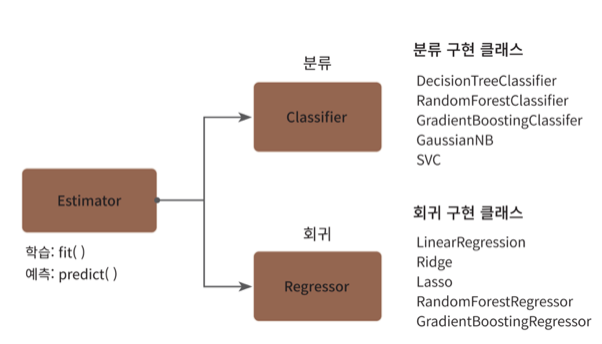

## 비지도학습인 : 차원축소, 클러스터링, Feature Extraction 같은 경우에는 대부분이 ***fit / transform*** 을 적용을 한다.
- 이 때의 fit()의 기능은 학습을 의미하는 것이 아니라  ***입력한 데이터의 형태에 맞춰 데이터를 변환하기 위한 사전 작업을 수행*** 을 의미하는 거임!!<br>
- 그리고 이 떄의 실제 작업은  ***transform***이 수행을 하게 되어서 직접 변환이 이루어지게 됨.<br>
- 물론 이 떄의 한 번에 결합을 해서 한 번에 해결하기 위해서  ***fit_transform***을 수행하기도 함. 단, 주의사항이 있기는 함;;;


## Scikit Learn 주요 모듈   
꼬오옥 알아두자아~~

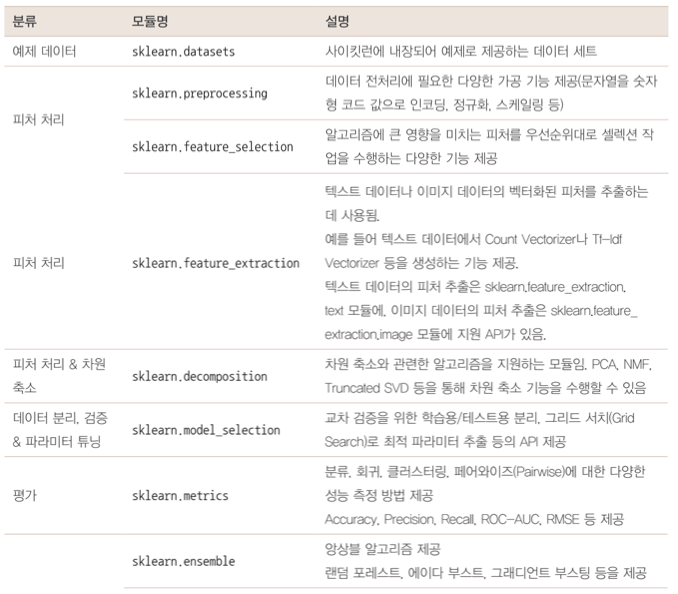

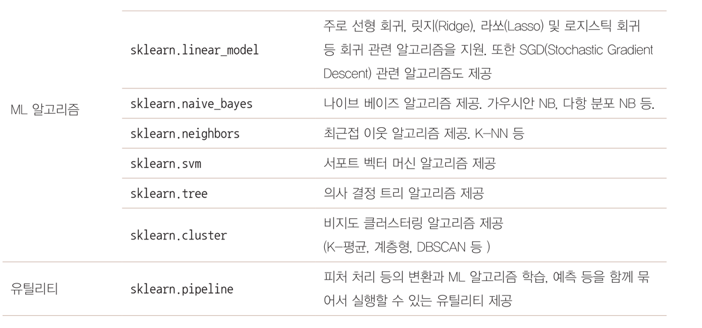

## 예제1_ 붓꽃 데이터

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
import pandas as pd

iris = load_iris()

iris_data = iris.data
iris_label = iris.target
print('iris target값:', iris_label)
print('iris target명:', iris.target_names)

# 붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환 
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


**<i class="fa fa-question-circle"></i>:** 데이터 안쪼개고 학습 데이터 세트로만 학습하고 예측한다면??

In [3]:
iris = load_iris()
dt_clf = DecisionTreeClassifier()
train_data = iris.data   # 학습할 데이터
train_label = iris.target # 학습할 정답지
dt_clf.fit(train_data, train_label)    # 데이터를 쪼개지 않고 그냥 학습 실행(오버플로팅..? 암 발생할 수도 있음)

DecisionTreeClassifier()

In [4]:
pred = dt_clf.predict(train_data)  # 내가 공부한거 가지고 그대로 평가 ===> 정확도가 매우 높음
# 그니까 앞에서 말헀듯이 train_data로 하면 안된다니까~~
print('예측 정확도:',accuracy_score(train_label,pred))

예측 정확도: 1.0


--> 미리 나올 문제(train_data)를 보고 학습을 하였기에 상당히 성능이 높게 나온다!!!
이러한 일이 발생을 하면, 내가 데이터를 뭔가 섞어서 한 것이 아닌가 의심을 해야함!!!

**<i class="fa fa-question-circle"></i>:** 이제 미리 시험문제가 뭐가 나올지 모르는 상태에서 공부를 하기 위해서, 모의고사와 실전 문제로 나누자!!

* test_size : 전체 데이터에서 테스트 데이터 세트 크기. 디폴트값 0.25,25%  
* train_size : 학습 데이터 세트 크기. 테스트 데이터 세트 크기 정하면 나머지가 학습 데이터이기 때문에 잘 사용 노노해~  
* shuffle : 데이터 분리 전에 데이터 섞을지 결정! 디폴트는 true. 데이터를 분산 시키기 때문에 좀더 효율적인 데이터 세트 만들 수 있다  
* random_state : 호출할 때 마다 같은 학습/테스트용 데이터 세트를 생성하기위한 난수 값. 지정하지 않으면 수행할 때마다 다른 데이터를 생성

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,test_size=0.3, random_state=121)

# test_size 는 실전이랑 문제지를 나누는 기준

dt_clf = DecisionTreeClassifier( )
dt_clf.fit(X_train, y_train)          # 모의고사 문제로 테스트 (통으로(iris_data) 보지 말자)
pred = dt_clf.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9556


--> 역시나 미리 뭐가 나올지 모르는 상태에서 공부를 하게 되니 100%하기가 쉽지 않게 되는 것!!!

## Cross-Validation (교차 검증)

* 과적합(Overfitting) : 모델이 학습 데이터에만 과도화게 최적화 되어 실제 예측을 다른 데이터로 수행할 때 예측 성능이 떨어지는 것  
* 이 문제를 해결하기 위해 교차 검증을 이용해서 더 다양한 학습과 평가 수행  
* 으음..시험 보기전에 모의고사 5년치 풀어보는 것 처럼...ㅋㅋ

### 1. k-Fold CV  
가장 보편적으로 사용되는 교차 검증 기법  
K개의 데이터 폴드 세트를 만들고 K번만큼 각 폴드 세트에 학습과 검증 평가를 반복적 수행

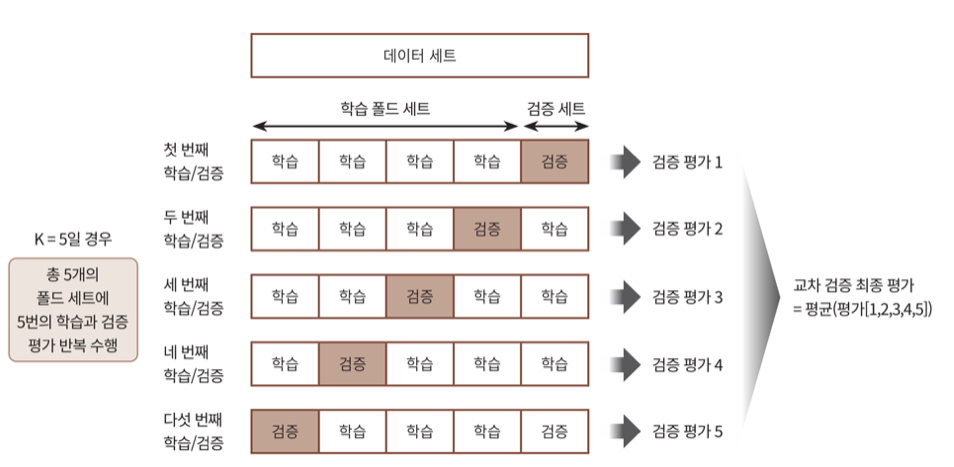

**<i class="fa fa-question-circle"></i> :** KFold클래스 사용_붓꽃데이터 

In [20]:
from sklearn.model_selection import KFold
import numpy as np

In [21]:
iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성.
kfold = KFold(n_splits = 5)   # 5등분 하겠다!! ( n_splits 파라미터가 중요!!!)
cv_accuracy = []
print('붓꽃 데이터 세트 크기:',features.shape[0])

붓꽃 데이터 세트 크기: 150


In [22]:
n_iter = 0

# KFold객체의 split( ) 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환  
for train_index, test_index  in kfold.split(features):
    # kfold.split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    #학습 및 예측 
    dt_clf.fit(X_train , y_train)    
    pred = dt_clf.predict(X_test)
    n_iter += 1
    
    # 반복 시 마다 정확도 측정 
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
# 개별 iteration별 정확도를 합하여 평균 정확도 계산 
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy)) 


#1 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 :0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 :0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 :0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 :0.7333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.9


### 2. Stratified K폴드 (Kfold문제점 보완)
불균형한 분포도를 가진 레이블 데이터 집합을 위한 Kfold방식  
=> 불균형한 분포도를 가진 레이블 데이터 집합 : 특정 레이블 값이 특이하게 많거나 적어서 값의 분포가 한쪽으로 치우치는 것     
  
예를 들어 대출건이 1억건, 대출 사기건이 1000천건이면 전체의 0.0001%로 아주 작은 확률
이렇게 너무 작은 비율의 레이블 값이 있으면 kfold로 아무리 랜덤하게 데이터 세트 만들어도 어떤거엔 작은 비율의 레이블이 많이 어떤거엔 적게 들어갈 수 있음!!  
이를 해결하기 위해 Stratified K폴드 사용하는 것!!

**<i class="fa fa-question-circle"></i> :**  먼저,붓꽃 데이터 세트에 레이블 값 분포도 확인해보기  
그리고, k-Fold에 대해서 해보고, 이를 Stratified k-fold에 대해서 해보기

In [23]:
import pandas as pd

iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label']=iris.target
iris_df['label'].value_counts()
# 결과 보면, 레이블 0,1,2가 50개로 동일하게 분포

2    50
1    50
0    50
Name: label, dtype: int64

In [24]:
kfold = KFold(n_splits=3)

n_iter =0
for train_index, test_index  in kfold.split(iris_df):
    n_iter += 1
    label_train= iris_df['label'].iloc[train_index]
    label_test= iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 2    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    50
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 2    50
0    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    50
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 1    50
0    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    50
Name: label, dtype: int64


위에 결과 보면 첫번째 교차 검증에서 학습 데이터는 1,2가 있어서 0은 학습하지 못했는데 검증을 0으로 해버리기 때문에 0을 절때절때 예측할 수 없음!!!  

**<i class="fa fa-question-circle"></i> :** 그래서 StratifiedFold 써볼꺼얌>< 

StratifiedKFold ===> 무엇을 기준으로 몇등분  
가장 큰 차이는 split()메서드에 인자로 피처 데이터 iris_df 뿐만 아니라 레이블 데이터 세트 iris_df['label']를 추가해주는 것이다!!!

In [26]:
from sklearn.model_selection import StratifiedKFold

In [27]:
skf = StratifiedKFold(n_splits=3)
n_iter=0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iter += 1
    label_train= iris_df['label'].iloc[train_index]
    label_test= iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 2    34
1    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    17
0    17
2    16
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 1    34
2    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    17
0    17
1    16
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    34
2    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    17
1    17
0    16
Name: label, dtype: int64


짠~~ 위에 결과 보면 1개의 검증의 학습/검증 데이터 세트에 0,1,2가 모두 들어가있다는 거 확인할 수 있다!!

### stratifiedfold 총정리 ( 데이터 나누고, 학습하고, 예측까지)

In [29]:
dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)

# random_state를 하기 위해서는 아래의 경우 처럼 사용..====> "suffle = True" 를 추가해주기
#skfold = StratifiedKFold(n_splits=3, shuffle=True,random_state=1234)

n_iter=0
cv_accuracy=[] #1번의 교차 검증후 정확도 넣을 배열

# StratifiedKFold의 split( ) 호출시 반드시 레이블 데이터 셋도 추가 입력 필요  
for train_index, test_index  in skfold.split(features, label):
    # split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    #학습 및 예측 
    dt_clf.fit(X_train , y_train)    
    pred = dt_clf.predict(X_test)

    # 반복 시 마다 정확도 측정 
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
# 교차 검증별 정확도 및 평균 정확도 계산 
print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.mean(cv_accuracy)) 


#1 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도 :0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.98 0.94 0.98]
## 평균 검증 정확도: 0.9666666666666667


* 참고) 회귀의 경우에는  stratified k-fold를 사용할 필요가 없음..  
 아니 사용하기 힘들당ㅠㅠ 어떤 비율로 유지할지에 대한 내용이 없기 때문에

### 3. cross_val_score : 교차 검증을 간편하게~

Kfold에서는 폴드 세트 설정하고, for 루프로 반복 학습/테스트 데이터 인덱스 추출하고, 학습/예측하고 예측 성능 평가  
corss_val_score()는 이 과정을 한번에 해준다!!  


cross_val_score( estimator, X, y=None,  scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')  

여기서 estimator, X, y, scoring, cv가 주요파라미터!!  
* estimator : 사이킷런 분류 알고리즘 클래스 Classfier 아니면 회귀 알고리즘 클래스 Regressor  
* X : 피처 데이터 세트  / y : 레이블 데이터 세트  
* scoring : 예측 성능 평가 지표  
* cv : 교차 검증 폴드 수

**<i class="fa fa-question-circle"></i> :** 그래서 cross_val_score() 써볼꺼얌><   
    
 성능 지표 : 정확도(accuracy) /  교차 검증 폴드 수(cv)는 3개   
CVS : 모델, 문제지, 정답지, 뭐로 채점, 몇등분....

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score 
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

scores = cross_val_score(dt_clf,   # 사용할 알고리즘 클래스, 여기서는 DTC
                        data, label,    # 문제지, 정답지 (X,y)
                        scoring = "accuracy", #(평가 기준)
                        cv = 3,       #  교차 검증 폴드 수
                        n_jobs=-1)   

print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


### 4. gridsearchCV : 교차 검증과 최적 하이퍼파라미터 튜닝을 한번에~

 하이퍼 파라미터를 잘 조정하면 알고리즘 예측 성능 개선할 수 있는거 알지용??  
 GirdSearchCVsms 최적의 파라미터의 조합들에 대해서 알려주지용~  
 * 직접 모든 조합에 대해서 다 하는 gridsearch  
 * 분포를 보고 적당한 조합들에 대해서 수행을 하는 randomgridsearch  
 
 단점은, 최적의 파라미터를 찾다보니까 수행시간이 길어진다는 거!!  
 만댝 6번에 걸쳐 하이퍼 파라미터를 변경하면서 CV가 3회라면 총 학습/평가는 18번 일어난다!! 

여기서 estimator, param_grid, scoring, cv, refit이 주요파라미터!!  
* estimator : 사이킷런 분류 알고리즘 클래스 Classfier 아니면 회귀 알고리즘 클래스 Regressor ++ pipeline  
* param_grid : key + 리스트 값을 가지는 딕셔너리. estimator의 튜닝을 위해 파라미터명과 사용될 여러 파라미터 값 지정  
* scoring : 예측 성능 평가 지표  
* cv : 교차 검증 폴드 수  
* refit : 디폴트 True, True이면 가장 최적 하이퍼파라미터 찾은 뒤 입력된 estimator객체를 해당 파라미터로 재학습

* 하나더!! GridSearchCV객체.fit(학습데이터 세트) 해주면  
[CV 만큼 폴딩 세트 분할]->[parm_grid에 기술된 파라미터 변경해가면서 학습/평가 수행]->[결과를 cv_results_속성에 기록]  
즉,  cv_results_를 통해 결과를 확인 할 수 있다!!

In [31]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 데이터를 로딩하고 학습데이타와 테스트 데이터 분리
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                    test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()


In [32]:
### parameter 들을 dictionary 형태로 설정
parameters = {
    "max_depth":[1,2,3],
    "min_samples_split":[2,3]
}

In [33]:
import pandas as pd

# param_grid의 하이퍼 파라미터들을 3개의 train, test set fold 로 나누어서 테스트 수행 설정.  
  
grid_dtree = GridSearchCV(dtree, param_grid=parameters,
                         cv=3, n_jobs=-1,
                         refit=True)  # refit => 인위적으로 중요한 파라미터 => 제일 좋은 조합으로 재학습(기본적인 값이 True)

# 붓꽃 Train 데이터로 param_grid의 하이퍼 파라미터들을 순차적으로 학습/평가 .
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', \
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


**<i class="fa fa-question-circle"></i> :** param칼럼은 적용된 하이퍼 파라미터 값  
**<i class="fa fa-question-circle"></i> :** rank_test_score칼럼은 예측 성능 순위  
**<i class="fa fa-question-circle"></i> :** split0_test_score	split1_test_score	split2_test_score 은 각 폴딩 세트에서의 테스트 성능

### GridSearchCV의 또다른 장점!!  
### best_params_,best_score_사용하면 최적 파라미터,정확도 알 수 있음!

In [34]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9750


### 마지막으로 best_estimator_이용해서 테스트 데이터 세트 예측하고 평가하기~~

In [36]:
# GridSearchCV의 refit으로 이미 학습이 된 estimator 반환
estimator = grid_dtree.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 하이퍼 파라미터로 학습이 됨
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

테스트 데이터 세트 정확도: 0.9667
